In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()
df['target'] = iris.target

df.head(5)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


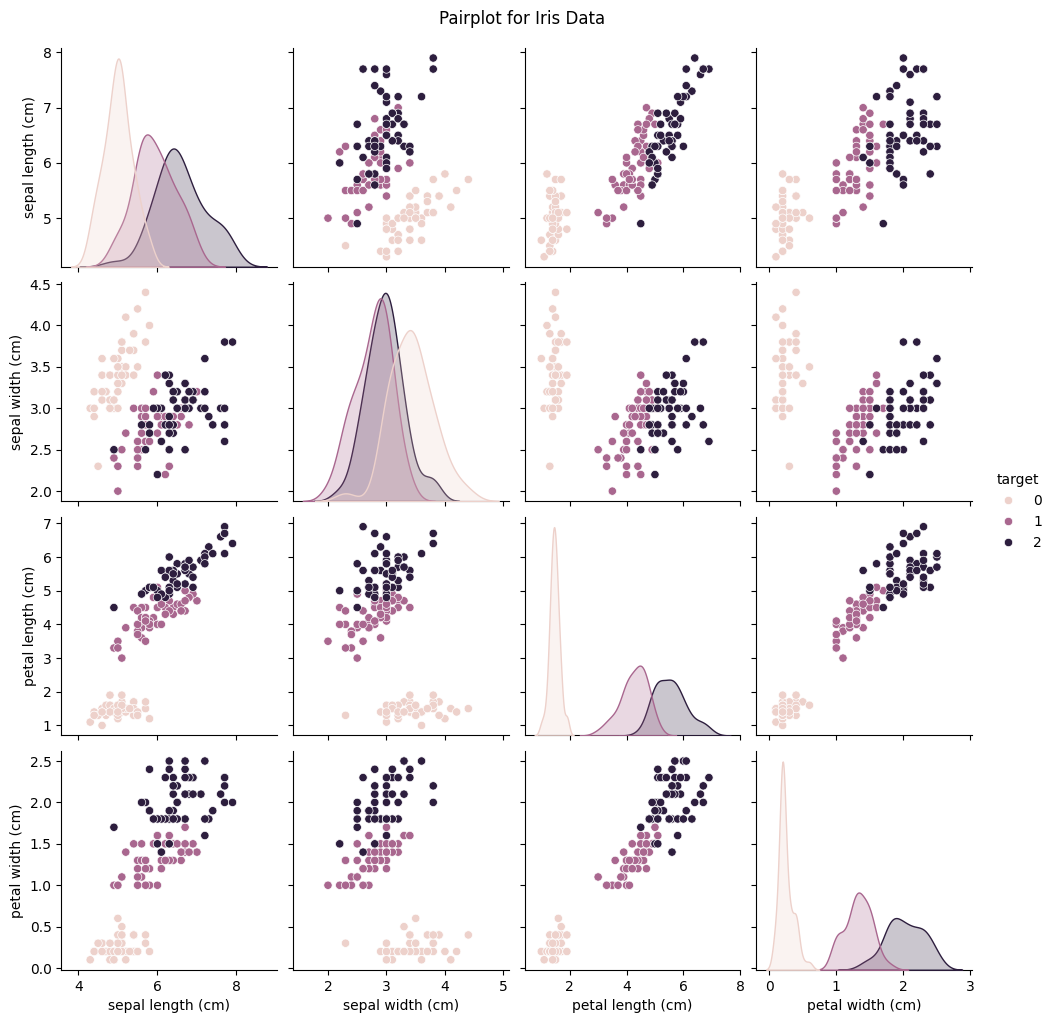

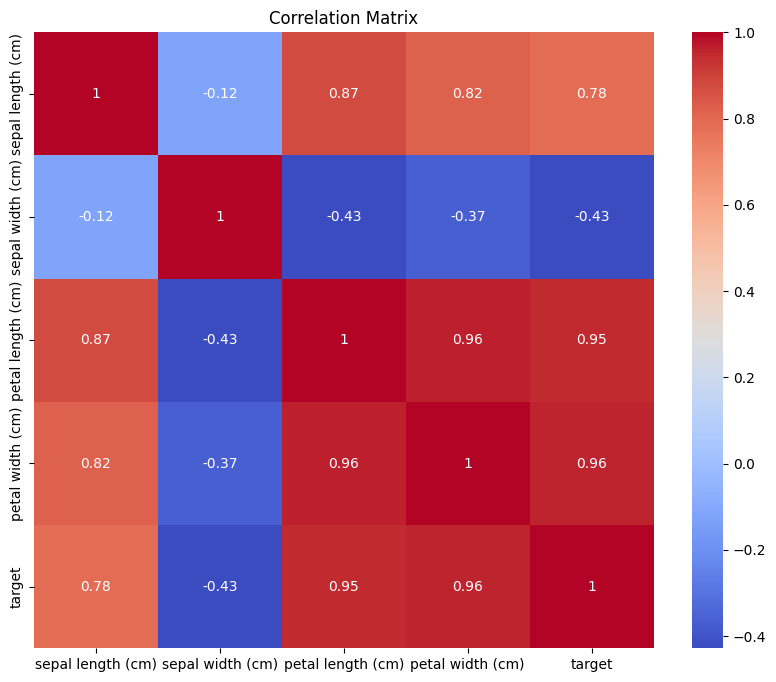

In [9]:



# Pair plot to visualize relationships between all pairs of features
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot for Iris Data', y=1.02)
plt.show()

# Correlation matrix heatmap to show feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()





In [4]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120
Testing set size: 30


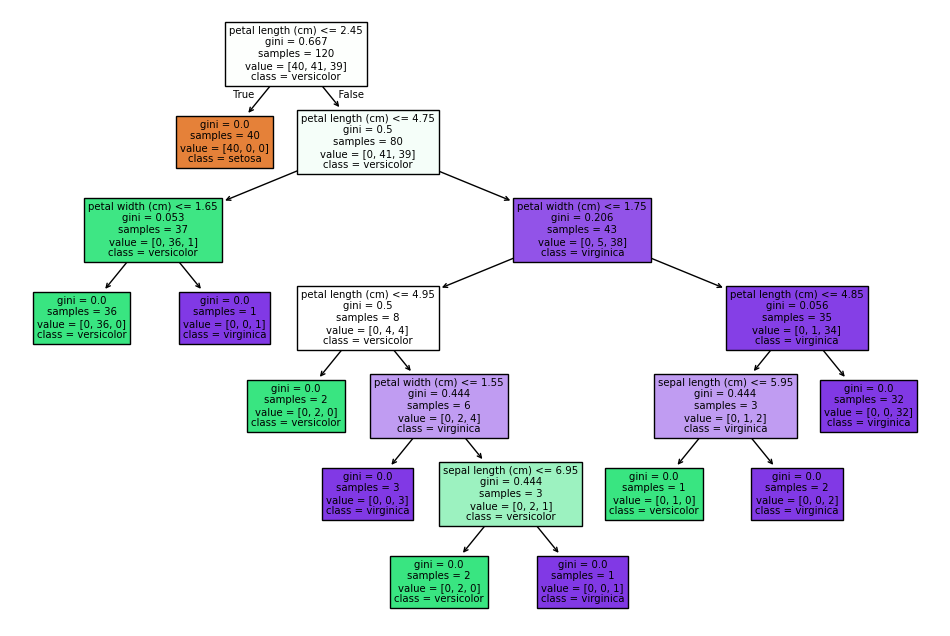

In [5]:


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


plt.figure(figsize=(12, 8))  # Adjust figure size if needed
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [6]:


y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy}')



report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(f"Classification Report:\n{report}")


matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{matrix}")

Accuracy:1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


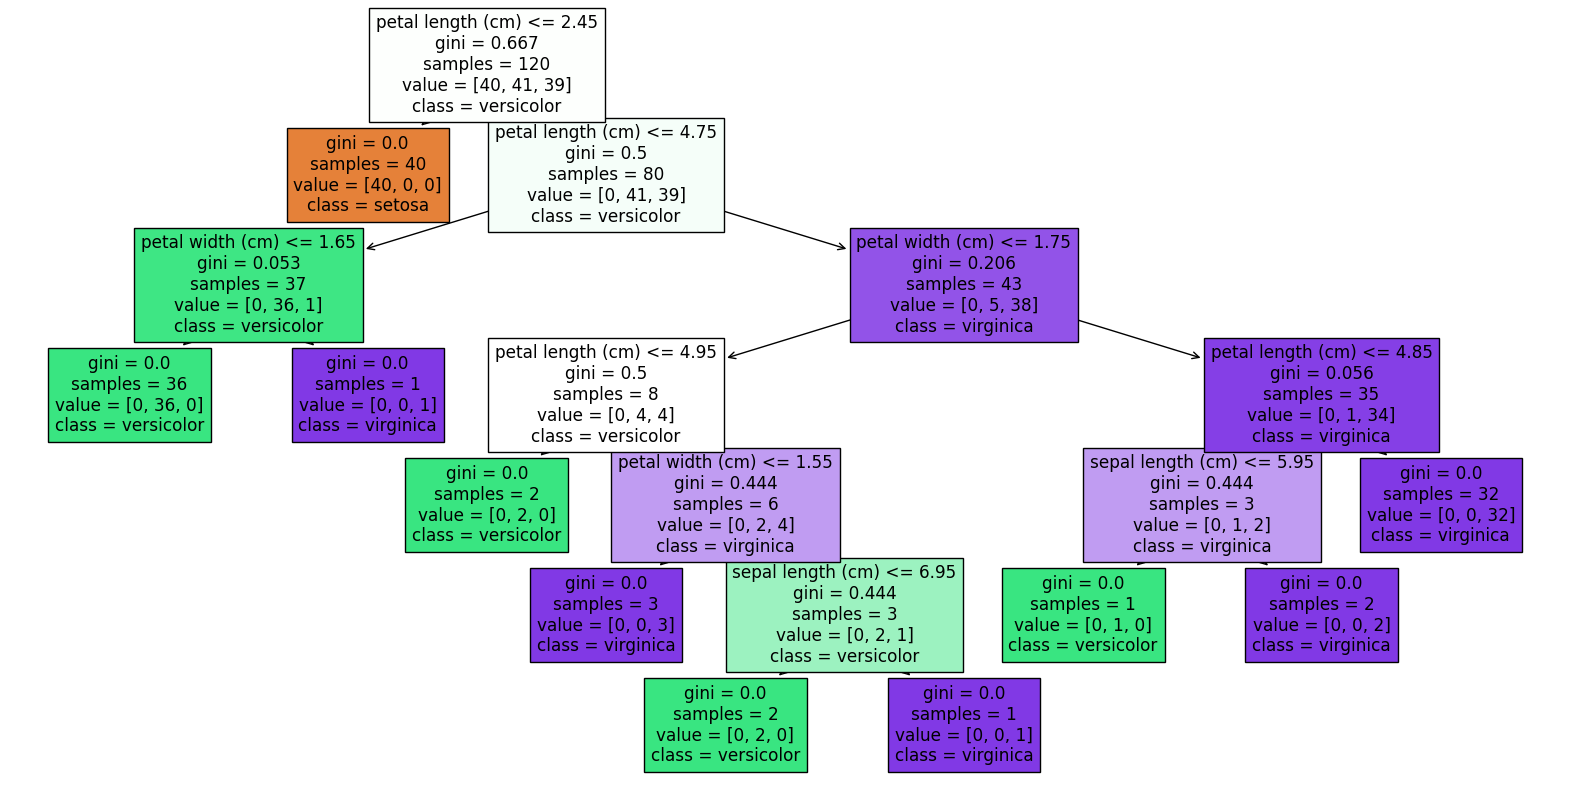

In [7]:


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

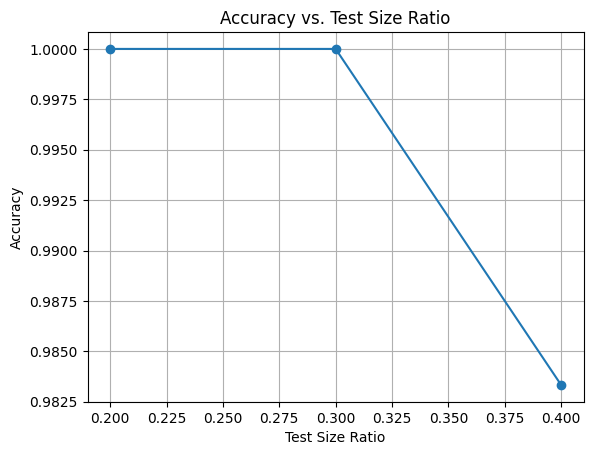

In [8]:
X = df.drop(columns=['target'])
y = df['target']

test_size_ratios = [ 0.2, 0.3, 0.4]

accuracy_scores = []

for test_size in test_size_ratios:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  clf = DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

plt.plot(test_size_ratios, accuracy_scores, marker='o')
plt.xlabel('Test Size Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Size Ratio')
plt.grid(True)
plt.show()